In [99]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt

print(tf.__version__)



2.11.0


In [100]:
data_dir = pathlib.Path("D:/Study/Sem 6/CSC566 IMAGE PROCESSING/project/train")

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)


12021


In [101]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)






Found 12180 files belonging to 5 classes.
Using 9744 files for training.
Found 12180 files belonging to 5 classes.
Using 2436 files for validation.


In [102]:
class_names = train_ds.class_names
print(class_names)

['Bacterial_spot', 'Early_blight', 'Late_blight', 'Spider_mites Two-spotted_spider_mite', 'Tomato_Yellow_Leaf_Curl_Virus']


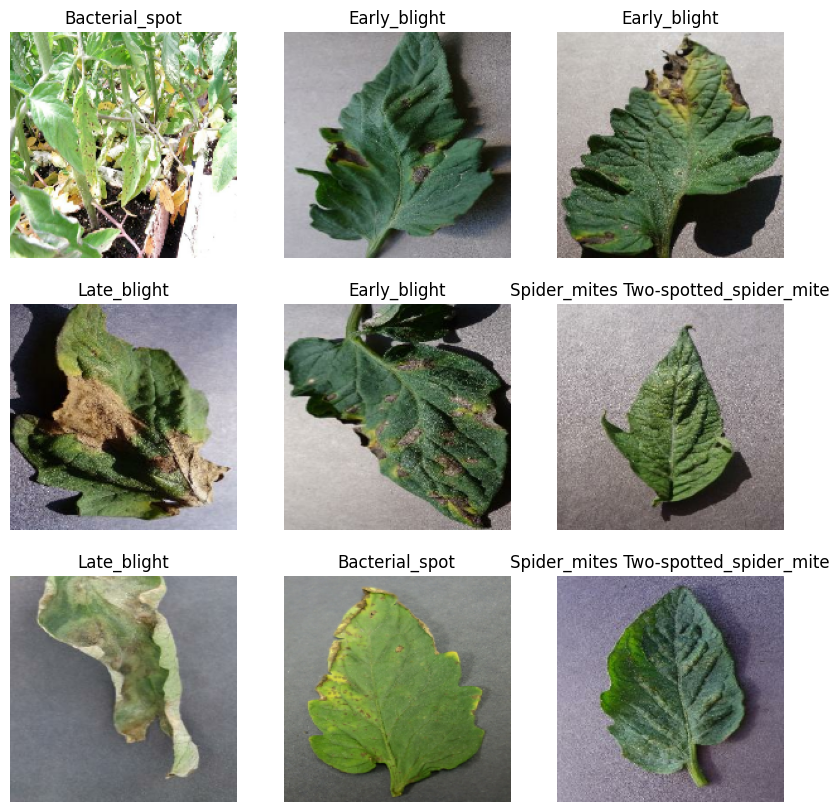

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [104]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [105]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [146]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [149]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [150]:
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])


In [151]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [153]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
305/305 [==============================] - 157s 515ms/step - loss: 0.4266 - accuracy: 0.8382 - val_loss: 0.4316 - val_accuracy: 0.8243
Epoch 2/10
305/305 [==============================] - 161s 526ms/step - loss: 0.3279 - accuracy: 0.8766 - val_loss: 0.4217 - val_accuracy: 0.8415
Epoch 3/10
305/305 [==============================] - 154s 505ms/step - loss: 0.2404 - accuracy: 0.9125 - val_loss: 0.5349 - val_accuracy: 0.8194
Epoch 4/10
305/305 [==============================] - 153s 502ms/step - loss: 0.1816 - accuracy: 0.9372 - val_loss: 0.6398 - val_accuracy: 0.8030
Epoch 5/10
305/305 [==============================] - 153s 501ms/step - loss: 0.1295 - accuracy: 0.9538 - val_loss: 0.7101 - val_accuracy: 0.8083
Epoch 6/10
305/305 [==============================] - 152s 498ms/step - loss: 0.0905 - accuracy: 0.9694 - val_loss: 0.5956 - val_accuracy: 0.8555
Epoch 7/10
305/305 [==============================] - 151s 497ms/step - loss: 0.0608 - accuracy: 0.9811 - val_loss: 0.7988 -

In [168]:
!mkdir -p saved_model
model.save('datatrain/saved_model/my_model') # save the model

INFO:tensorflow:Assets written to: datatrain/saved_model/my_model\assets


INFO:tensorflow:Assets written to: datatrain/saved_model/my_model\assets


In [154]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [166]:
test_image_path = "D:/Study/Sem 6/CSC566 IMAGE PROCESSING/project/valid/Bacterial_spot/0a6d40e4-75d6-4659-8bc1-22f47cdb2ca8___GCREC_Bact.Sp 6247.JPG"


In [167]:
img = image.load_img(test_image_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
normalized_img_array = normalization_layer(img_array)

# Make prediction
prediction = probability_model.predict(normalized_img_array)
predicted_label = np.argmax(prediction)

print("Predicted label:", class_names[predicted_label])

1/1 [==============================] - 0s 25ms/step
Predicted label: Late_blight
